In [3]:
import matplotlib.pyplot as plt 
import pandas as pd

from sklearn import datasets, linear_model 
from sklearn.metrics import mean_squared_error, r2_score 

# Load data from scikit-learn datasets

Import data from skelearn.datasets module using the `load_diabetes` function. 
Then we create 2 pandas dataframes: 
- diabetes_X: quant predictors. We pull the feature_names also from the `load_diabetes` function. 
- diabets_Y: target variable. 

In [19]:
diabetes_X , diabetes_Y = datasets.load_diabetes(return_X_y= True)
# to pandas dataframe 
diabetes_X = pd.DataFrame(diabetes_X)
diabetes_Y = pd.DataFrame(diabetes_Y)


diabetes_X.columns = datasets.load_diabetes()['feature_names']
diabetes_Y.columns = ['target']

In [27]:
diabetes_X.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


# Exploratory Data Analysis

In [25]:
diabetes_Y['target'].describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

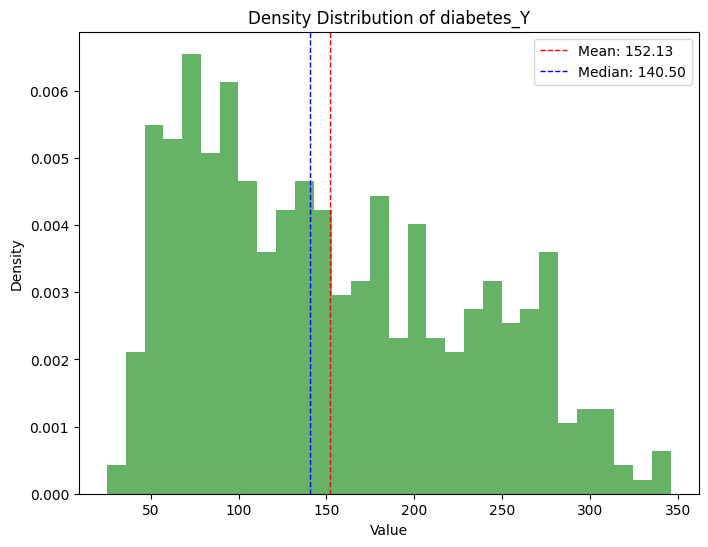

In [41]:
plt.figure(figsize=(8, 6))
plt.title("Density Distribution of diabetes_Y")
plt.xlabel("Value")
plt.ylabel("Density")
plt.hist(diabetes_Y, bins=30, density=True, alpha=0.6, color='g')
mean_value = diabetes_Y['target'].mean()
median_value = diabetes_Y['target'].median()

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')

plt.legend()
plt.show()

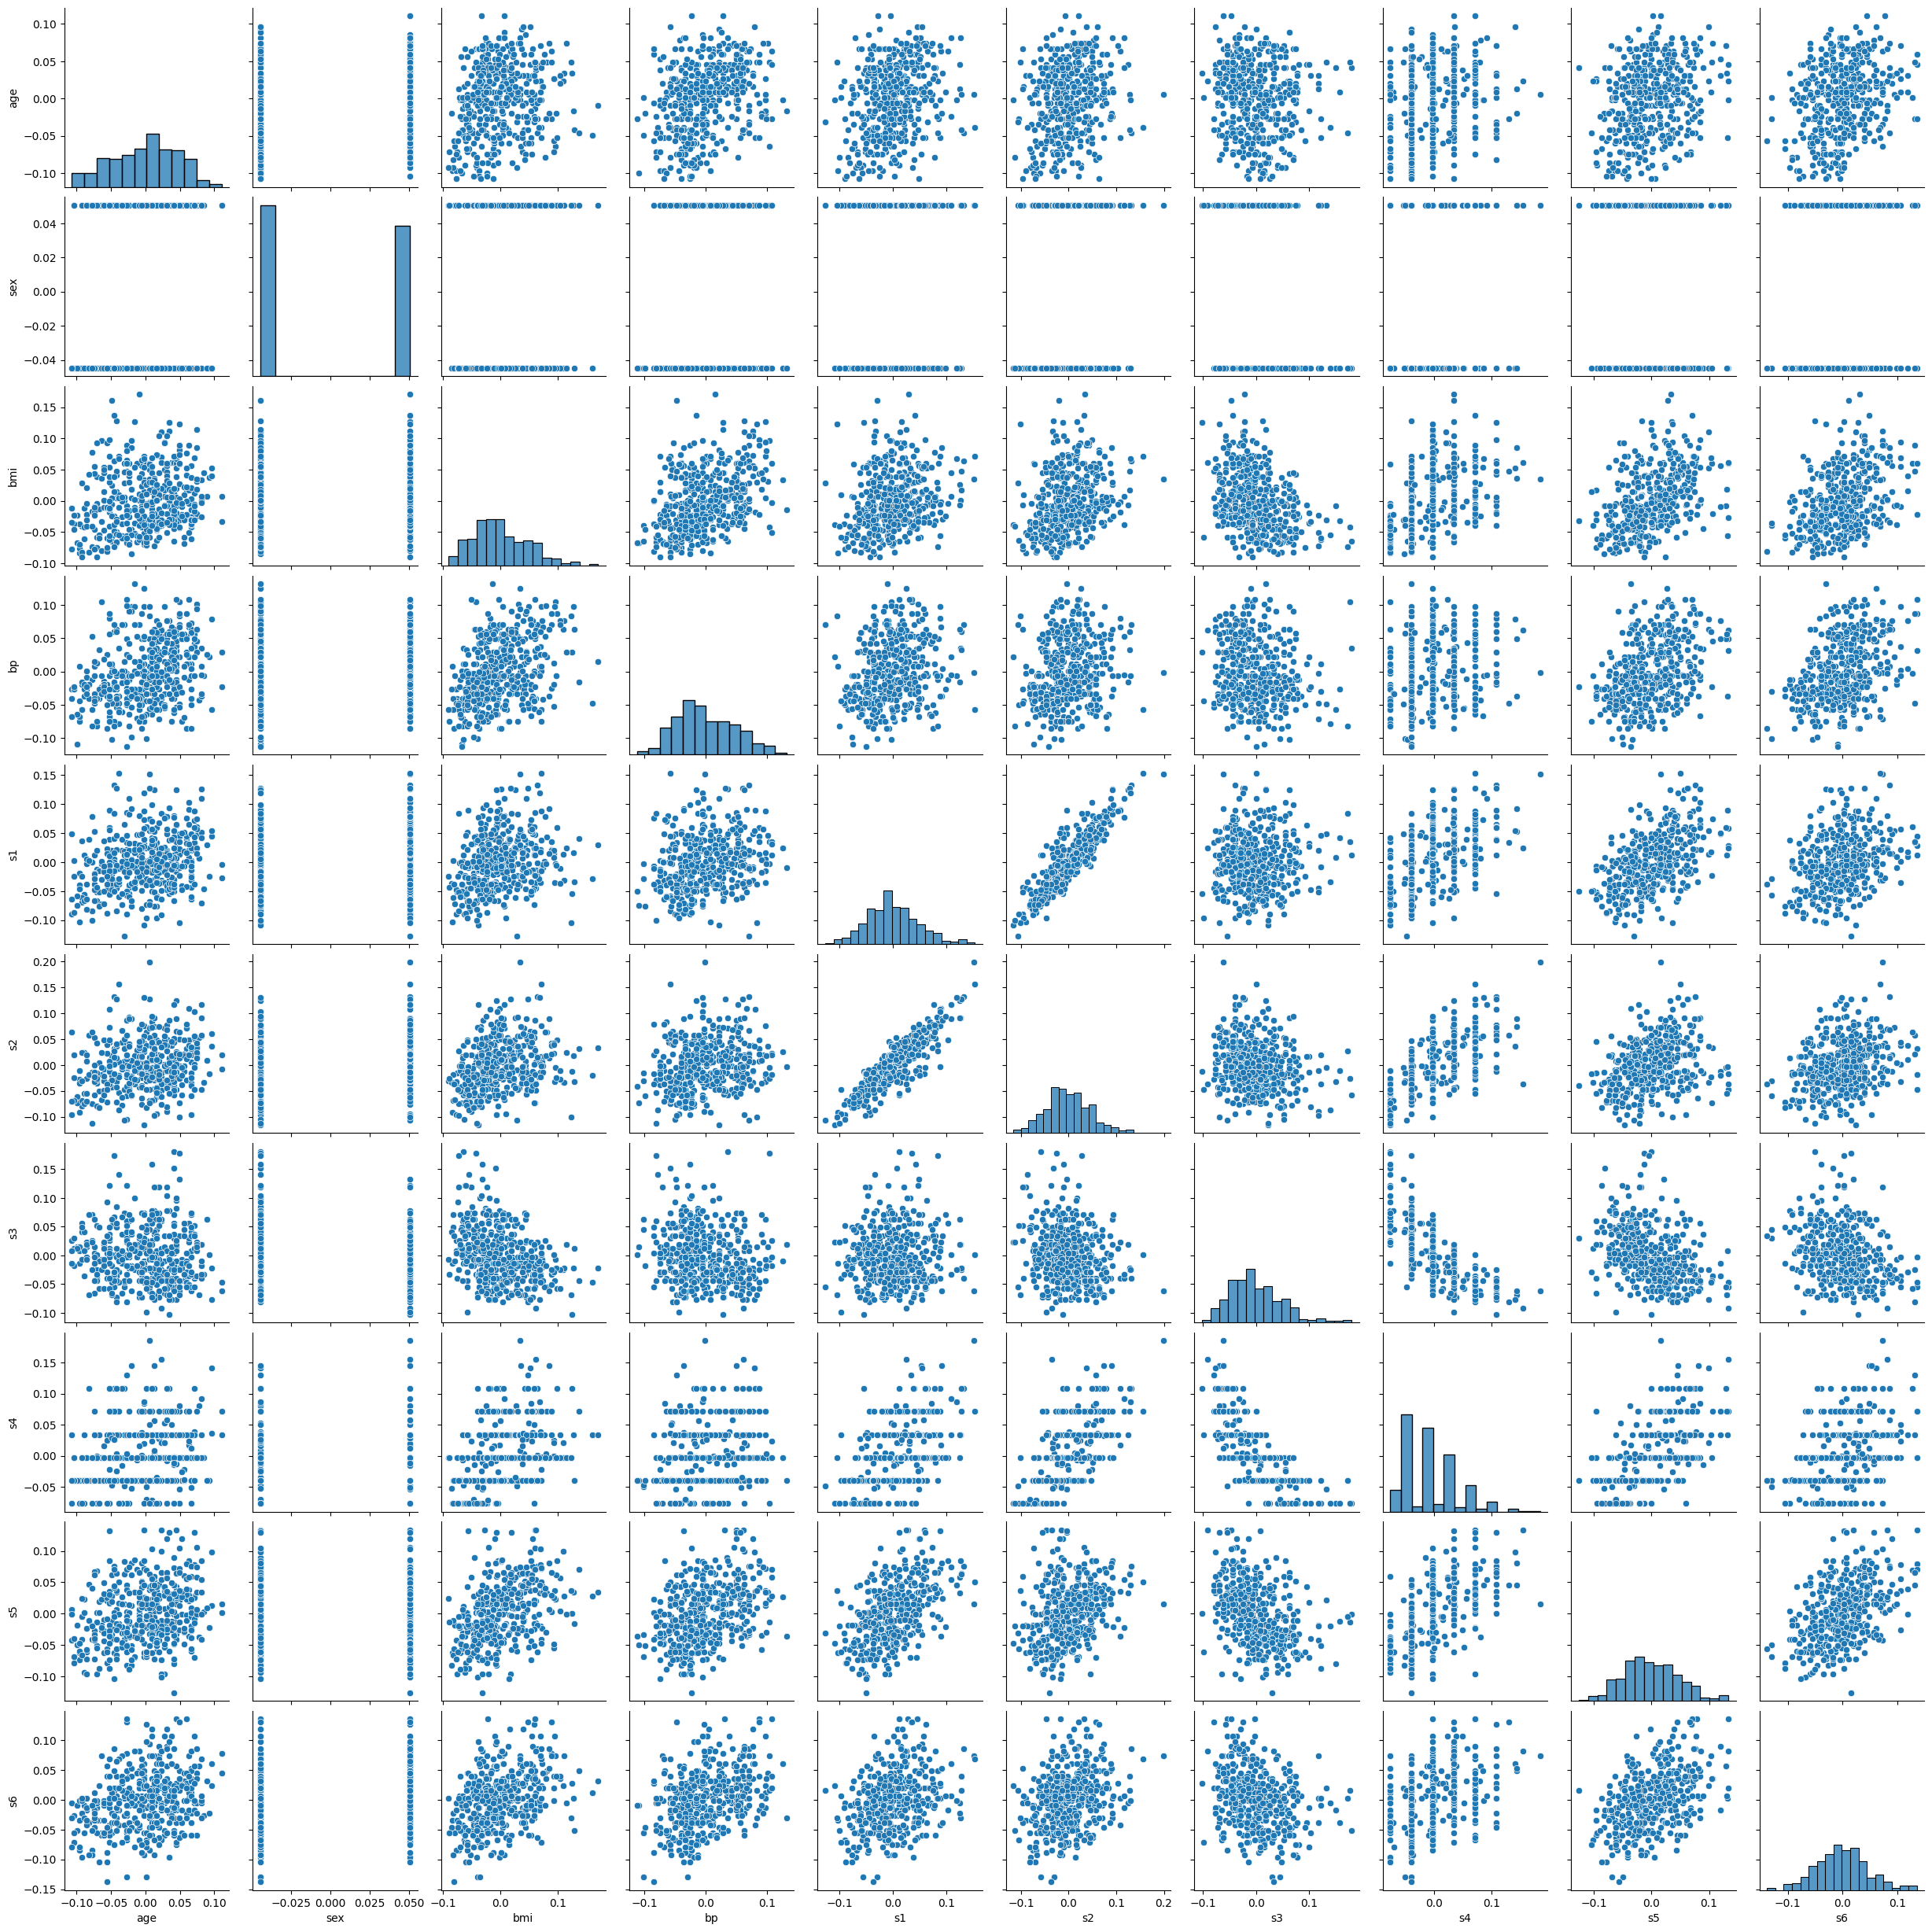

In [29]:
import seaborn as sns 

sns.pairplot(diabetes_X)
plt.show()

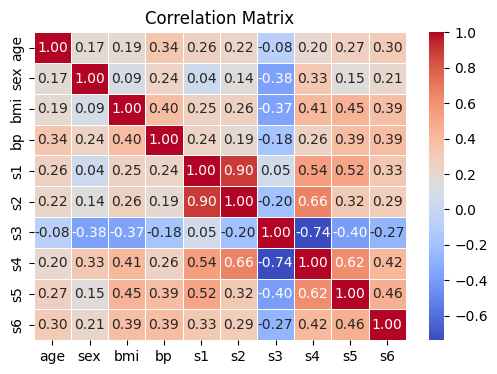

In [30]:
corr = diabetes_X.corr() 

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Now that we have identified the variables with high correlation (S2 and S4), we remove them from the dataset to avoid multicollinearity issues. This step ensures that our model is not negatively impacted by redundant information.

In [33]:
diabetes_X_useful = diabetes_X.drop(['s2', 's4'], axis = 'columns')

In [ ]:
import statsmodels.api as sm
# Adds a column of 1s to account for the intercept 
diabetes_X_useful = sm.add_constant(diabetes_X_useful)

model = sm.OLS(diabetes_Y, diabetes_X_useful).fit() 
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.506    
Dependent Variable: target           AIC:                4792.8601
Date:               2025-03-30 19:28 BIC:                4829.6819
No. Observations:   442              Log-Likelihood:     -2387.4  
Df Model:           8                F-statistic:        57.38    
Df Residuals:       433              Prob (F-statistic): 2.63e-63 
R-squared:          0.515            Scale:              2938.2   
-------------------------------------------------------------------
           Coef.    Std.Err.     t     P>|t|     [0.025     0.975] 
-------------------------------------------------------------------
const     152.1335    2.5783  59.0061  0.0000   147.0660   157.2010
age        -7.6228   59.7408  -0.1276  0.8985  -125.0408   109.7951
sex      -231.9665   61.0511  -3.7995  0.0002  -351.9598  -111.9732
bmi       526.4297   66.2586   7.9451  0.0000   396.2012   656.6582
bp    

From the results above, we observe the following: 
- The variables `age` and `s6` are not statistically significant in predicting the target variable.
- The Durbin-Watson statistic indicates that the residuals are independent.
- The first model explains 51.5% of the variance in the target variable (R² score).

In [40]:
diabetes_X_useful_opt = diabetes_X_useful.drop(['age', 's6'], axis = 'columns')
model_opt = sm.OLS(diabetes_Y, diabetes_X_useful_opt).fit() 
print(model_opt.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.507    
Dependent Variable: target           AIC:                4790.1219
Date:               2025-03-30 19:30 BIC:                4818.7611
No. Observations:   442              Log-Likelihood:     -2388.1  
Df Model:           6                F-statistic:        76.44    
Df Residuals:       435              Prob (F-statistic): 6.31e-65 
R-squared:          0.513            Scale:              2933.0   
-------------------------------------------------------------------
           Coef.    Std.Err.     t     P>|t|     [0.025     0.975] 
-------------------------------------------------------------------
const     152.1335    2.5760  59.0578  0.0000   147.0705   157.1965
sex      -226.4905   60.4300  -3.7480  0.0002  -345.2615  -107.7195
bmi       537.5785   65.4302   8.2161  0.0000   408.9798   666.1772
bp        328.2512   62.8688   5.2212  0.0000   204.6868   451.8156
s1    

We end up with a slimmer model. Although it has a slightly lower R² score, the adjusted R² score is higher. This indicates that removing the two extra variables was beneficial. Additionally, our Prob(F-stat) improved, along with better AIC and BIC scores.